Suponga que le han pedido averiguar si existe una relación entre el
número de veces que batean los jugadores de un equipo de béisbol y el
número de runs que consigue. En caso de existir y de establecer un modelo,
podría predecir el resultado del partido para los siguientes datos:

In [1]:
# Datos
#=======================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
"Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
"Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
"Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
"Atlanta","Washington","San.F","San.I","Seattle"]

bateos = [5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654,
735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641,
624, 570, 593, 556]

In [2]:
import pandas as pd
import seaborn as sns
import sklearn as skl
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
df.head()


,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762


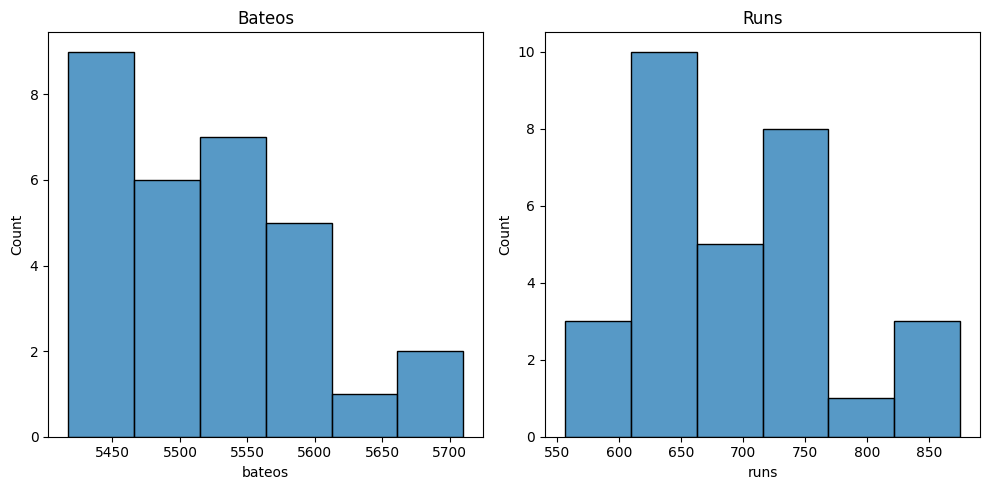

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(data=df, x='bateos', ax=axes[0])
axes[0].set_title('Bateos')
sns.histplot(data=df, x='runs', ax=axes[1])
axes[1].set_title('Runs')

plt.tight_layout()
plt.show()


En una primera vista en el histograma uno esperaria que haya mas equipos con un rendimiento menor en bateos y carreras y el grafico fuera decreciente sin embargo vemos una ligera curva al extremo mas derecho del histograma. Esto solo concluye que hay que investigar un poco mas

<Axes: xlabel='bateos', ylabel='runs'>

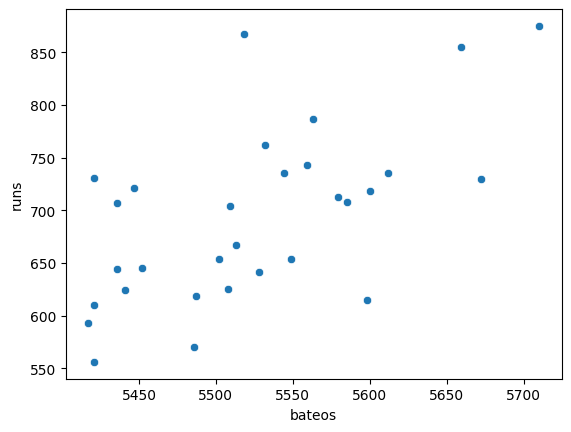

In [5]:
sns.scatterplot(x='bateos', y='runs', data=df)

In [6]:
df.bateos.corr(df.runs)
#Correlacion

0.6106270467206688

En el histogramma podemos ver una correlacion positiva pero bastante mediana entre los bateos y las carreras

In [7]:
df.describe()

,bateos,runs
count,30.000000,30.000000
mean,5523.500000,693.600000
std,79.873067,82.479088
min,5417.000000,556.000000
25%,5448.250000,629.000000
50%,5515.500000,705.500000
75%,5575.000000,734.000000
max,5710.000000,875.000000


In [8]:
#Dividir datos para que lo ingeste el modelo de regresion linear
X = df.bateos
y = df.runs
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size=0.2, random_state=42)

lrg = LinearRegression()

lrg.fit(X_train, y_train)

print(f'Coeficiente: {lrg.coef_[0]}, Intercepto: {lrg.intercept_}')

Coeficiente: [0.66685087], Intercepto: [-2981.51721258]


<Axes: xlabel='bateos', ylabel='runs'>

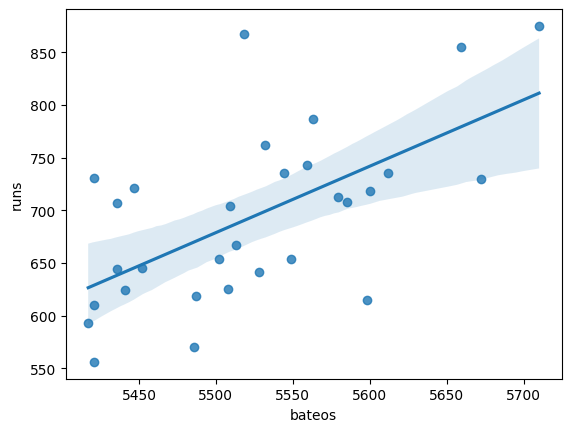

In [9]:
sns.regplot(x='bateos', y='runs', data=df)

Seaborn ya tiene un tipo de grafico que nos entrega el scatter con la linea de regresion de una vez

In [10]:
y_pred = lrg.predict(X_test)
y_pred

array([[676.82663312],
       [738.84376357],
       [654.15370371],
       [692.16420301],
       [715.50398329],
       [751.51393   ]])

In [11]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

5219.975632116472

In [12]:
rmse = np.sqrt(mse)
rmse

72.24939883567525

In [13]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

51.61164068147824

Segun los datos obtenidos existe una mediana relacion entre la cantidad de bateos y numero de runs que puede hace un equipo el grafico de dispersion nos muestra una correlacion positiva entre los bateos y los runs. Segun la cantidad de datos obtenida teniendo en cuenta que el MAE esta ubicado en torno a 51 y tomando en cuenta las magnitudes de las que se esta trabajando el modelo tiene una eficiencia que podria mejorarse para predecir los valores, ademas tomando el cuenta que el baseball es un deporte que cuenta con muchisimas variables valdria la pena recabar mas informacion para obtener un modelo mas ajustado a las necesidades.